# 4.7: 基于生成式张量网络的概率分类方法

> Reference: _Generative tensor network classification model for supervised machine learning_

考虑利用每一类训练样本，分别训练一个GMPS，记为$|\psi^{[c]}\rangle$（其中 $c$ 代表 $c$ 类）

对于某个待分类的样本（记为$y$），各个GMPS生成该样本的概率满足玻恩概率诠释，这个概率相对于是给定了分类的条件概率，即
  
$$p(y|c) = |\langle\Phi|\psi^{[c]}\rangle|^2$$

其中 $|\Phi\rangle$ 为 $y$ 经过特征映射所得的量子态。

对分类的预测满足：$\tilde{c} = \arg\max_c p(y|c)$

这样做是合理的，例如，当 $y$ 代表一张猫的图片时，用猫的图片对应的GMPS得到该图的概率显然应大于用狗图片对应 GMPS得到该图的概率，即我们预期
  
$$p(y \in c|c) \gg p(y \not\in c|c)$$

## 证明

### 背景知识

可由贝叶斯 (Bayes) 公式给出更加严谨的数学基础：

考虑一组事件集合{$A_n$}，满足集合中任意二事件同时发生的概率为0（互斥），且所有事件发生的概率和为1，有$\sum_n p(A_n) = 1$。我们称这样的事件集合为**完备事件组**。

这组事件集合中的每一个事件都可能导致另一个事件 $B$ 的发生与否，对应的概率由条件概率 $p(B|A_n)$ 给出。此时，事件$B$发生的概率满足全概率公式

$$p(B) = \sum_n p(B|A_n)p(A_n)$$

一类简单的完备事件组是某一事件$A$及其对立事件$\bar{A}$，例如，$A$代表打雷这件事，则$\bar{A}$代表没有打雷。那么，下雨的概率满足

$$p(下雨) = p(下雨|打雷)p(打雷) + p(下雨|不打雷)p(不打雷)$$

事件$B$与某个$A_n$同时发生的概率（被称为联合概率）满足
$$p(A_n, B) = p(B|A_n)p(A_n)$$
例如，打雷且下雨的概率等于打雷的概率$p(打雷)$乘以打雷的情况下下雨的概率$p(下雨|打雷)$。

下面我们将所考虑的问题转换一下：如果我们已知打雷的概率、打雷时下雨的概率，以及不打雷时下雨地概率，能否给出下雨时打雷的概率呢？

根据联合概率公式，打雷且下雨的联合概率满足两个等式
$$p(打雷,下雨) = p(打雷|下雨)p(下雨) = p(下雨|打雷)p(打雷)$$

于是有
$$p(打雷|下雨) = \frac{p(下雨|打雷)p(打雷)}{p(下雨)}$$

其中概率$p(下雨)$并未直接给出，但可以通过全概率公式计算，即
$$p(下雨) = p(下雨|打雷)p(打雷) + p(下雨|不打雷)[1-p(打雷)]$$

另一种理论上等价的方式是利用概率的归一性，即 $p(打雷|下雨) + p(不打雷|下雨) = 1$。由于

$$p(不打雷|下雨) = \frac{p(下雨|不打雷)p(不打雷)}{p(下雨)}$$

我们只需计算 $p'(打雷|下雨) = p(下雨|打雷)p(打雷)$，以及 $p'(不打雷|下雨) = p(下雨|不打雷)[1-p(打雷)]$，并计算归一化因子
$$Z = p'(打雷|下雨) + p'(不打雷|下雨)$$

则有$p(不打雷|下雨) = p'(不打雷|下雨)/Z$。容易看出，$Z = p(下雨)$，其就是全概率公式。

综上有

$$p(打雷|下雨) = \frac{p(下雨|打雷)p(打雷)}{p(下雨|打雷)p(打雷) + p(下雨|不打雷)[1-p(打雷)]}$$

上式的一般形式为

$$p(A_n|B) = \frac{p(B|A_n)p(A_n)}{\sum_m p(B|A_m)p(A_m)}$$

该式被称为贝叶斯公式或贝叶斯定理，其中边缘（marginal）概率 $p(A_n)$ 被称为**先验（prior）概率**，条件概率 $p(A_n|B)$ 也被称为**后验（posterior）概率**，条件概率 $p(B|A_n)$ 也被称为**似然（likelihood）函数**

### GMPSC

回到基于GMPS的分类方法：GMPS给出贝叶斯公式中的似然函数 $p(y|c) = |\langle\Phi|\psi^{[c]}\rangle|^2$

先验概率 $p(c)$ 可认为是随机从训练集抽取一个样本时，所选样本属于第 $c$ 类的概率。一般情况下，训练集各类所含的样本数相等，因此我们可以取 $p(c) = 1/C$，其中 $C$ 为总类别数，因此先验概率的取值与样本 $y$ 及类别 $c$ 无关。

将上述先验概率与似然函数代入贝叶斯公式，得到样本$y$属于各类的条件（后验）概率，满足

$$p(c|y) = \frac{p(y|c)}{CZ}$$

其中 $Z$ 为归一化系数，由于类别预测满足 $\hat{c} = \text{argmax}_c p(c|y)$，通过该式不难看出，$Z$ 的值并不影响 $\hat{c}$，因此可直接取

$$\hat{c} = \text{argmax}_c p(y|c) = \text{argmax}_c |\langle\Phi|\psi^{[c]}\rangle|^2$$

依据上式实现的GMPS分类模型，被称为GMPS分类器（GMPSC）。

也可取 $\hat{c} = \text{argmax}_c \ln|\langle\Phi|\psi^{[c]}\rangle|^2$，避免计算指数小的 $|\langle\Phi|\psi^{[c]}\rangle|^2$（正交灾难）。

## Code

In [1]:
import torch
from tensor_network.utils.data import load_mnist_images
from tensor_network.algorithms.gmps import train_gmps, eval_nll
from tensor_network.mps.modules import MPS, MPSType
from tensor_network.feature_mapping import cossin_feature_map
import matplotlib.pyplot as plt
from typing import List
from tqdm.auto import tqdm

mnist_cache_path = "datasets/MNIST"
CLASSES = list(range(10))

THETA = 0.5  # theta is important to map the feature in range [0, 1]

### Training MNIST GMPSs

In [2]:
# hyperparameters
device = torch.device("cpu")
lr = 1e-1
sweep_times = 10

feature_dim = 2  # since we use cossin feature map
feature_num = 28 * 28
virtual_dim = 64

theta = THETA
# No normalization for MNIST because doing so will map some data to negative values
MNIST_NORMALIZATION = False

In [3]:
skip_classes = [None]  # None to skip all training
trained_classes = []

for train_class in CLASSES:
    if None in skip_classes:
        break
    if train_class in skip_classes:
        continue
    print(f"Training GMPS for class {train_class}")
    images = load_mnist_images(
        cache_path=mnist_cache_path,
        num=None,
        from_subset="train",
        shuffle=True,
        classes=train_class,
        normalization=MNIST_NORMALIZATION,
    )
    train_data = images.reshape(images.shape[0], -1).to(device)
    train_data = cossin_feature_map(train_data, theta=theta)
    mps = MPS(
        length=feature_num,
        physical_dim=feature_dim,
        virtual_dim=virtual_dim,
        mps_type=MPSType.Open,
        dtype=torch.float32,
        device=device,
        requires_grad=False,
    )
    losses, mps = train_gmps(
        samples=train_data,
        batch_size=train_data.shape[0],  # mega batch, can change to micro batch
        mps=mps,
        sweep_times=sweep_times,
        lr=lr,
        device=device,
        enable_tsgo=True,
    )
    test_images = load_mnist_images(
        cache_path=mnist_cache_path,
        num=None,
        from_subset="test",
        shuffle=False,
        classes=train_class,
        normalization=MNIST_NORMALIZATION,
    )
    test_data = test_images.reshape(test_images.shape[0], -1).to(device)
    test_data = cossin_feature_map(test_data, theta=theta)
    test_nll = eval_nll(samples=test_data, mps=mps, device=device)
    plt.figure(figsize=(10, 6))
    plt.plot(losses, label="Training NLL")
    plt.axhline(y=test_nll, color="r", linestyle="--", label="Test NLL")
    plt.xlabel("Sweep")
    plt.ylabel("Loss")
    plt.title(f"Training and Test Losses for class {train_class}")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"datasets/mps/mnist_{train_class}_losses.png")
    plt.show()
    path = f"datasets/mps/mnist_{train_class}_mps.safetensors"
    mps.save_to_safetensors(path)
    print(f"Saved GMPS for class {train_class} to {path}\n")
    trained_classes.append(train_class)

print("Training complete")
print(f"Trained classes: {trained_classes}")

Training complete
Trained classes: []


### GMPS Classification

In [4]:
test_device = torch.device("cpu")

In [5]:
gmpss = []

for train_class in CLASSES:
    path = f"datasets/mps/mnist_{train_class}_mps.safetensors"
    mps = MPS.load_from_safetensors(path, requires_grad=False)
    mps.to_(device=test_device)
    gmpss.append(mps)

test_images = []

for test_class in CLASSES:
    test_data = load_mnist_images(
        cache_path=mnist_cache_path,
        num=None,
        from_subset="test",
        shuffle=False,
        classes=test_class,
        normalization=MNIST_NORMALIZATION,
    )
    test_data = test_data.reshape(test_data.shape[0], -1).to(test_device)
    test_images.append(test_data)

In [6]:
# |export algorithms.gmps


def gmps_classify(gmpss: List[MPS], data: torch.Tensor) -> torch.Tensor:
    """
    Use a group of MPS to classify the data.

    Args:
        gmpss: List[MPS], the group of MPS to classify the data.
        data: torch.Tensor, the feature-mapped data to classify.
    Returns:
        torch.Tensor, the predictions of the data.
    """
    num_gmps = len(gmpss)
    assert num_gmps > 0, "No GMPSs provided"
    assert data.ndim == 3, "Data must be a 3D tensor of shape (batch, feature_num, feature_dim)"
    feature_num = data.shape[1]
    assert feature_num == gmpss[0].length, "Feature number mismatch"

    nll_of_gmps = []
    for gmps in gmpss:
        nll = eval_nll(samples=data, mps=gmps, device=gmps.device, return_avg=False)  # (batch)
        nll_of_gmps.append(nll)

    nll_of_gmps = torch.stack(nll_of_gmps, dim=1)  # (batch, num_gmps)
    predictions = torch.argmin(nll_of_gmps, dim=1)  # (batch)
    return predictions

In [7]:
accuracies = []

for test_class in tqdm(CLASSES):
    test_data = test_images[test_class]
    test_samples = cossin_feature_map(test_data, theta=THETA)

    predictions = gmps_classify(gmpss, test_samples)
    acc = (predictions == test_class).float().mean()
    accuracies.append(acc)

  0%|          | 0/10 [00:00<?, ?it/s]

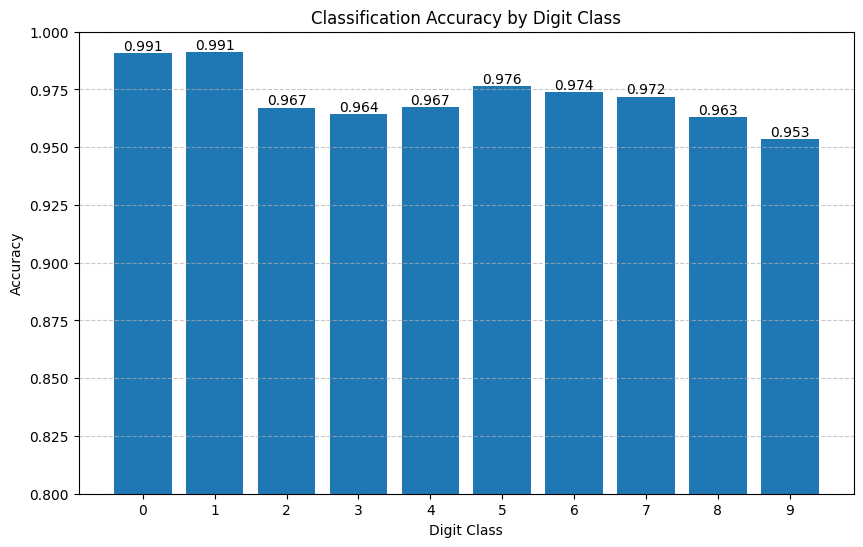

In [8]:
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(CLASSES)), accuracies)
plt.xticks(range(len(CLASSES)), CLASSES)
plt.xlabel("Digit Class")
plt.ylabel("Accuracy")
plt.title("Classification Accuracy by Digit Class")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.ylim(0.8, 1.0)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.3f}", ha="center", va="bottom")

plt.show()